In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [4]:
perch_df = df.loc[df['Species'] == 'Perch']

perch_length = perch_df[['Length2']]
perch_weight = perch_df[['Weight']]

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

In [7]:
# 선형회귀 (linear)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [8]:
lr.score(test_input, test_target)

0.8768736217702061

In [11]:
lr.predict([[90]])
# kneighbor 경우는 근접한 곳의 값을 매기기 때문에 값이 아무리 커지거나 작아져도 인접한 값이 나오지만 선형회귀의 경우에는 선을 그어서 값을 예상함

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2702.49031596]])

In [17]:
# ml에서 기울기를 종종 coefficient(계수) or wight(가중치)라고 부름
lr.coef_

array([[37.53166201]])

In [13]:
lr.intercept_

array([-675.35926531])

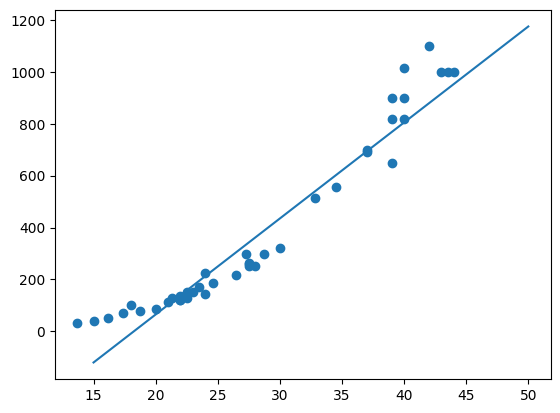

In [16]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 *  37 - 675, 50 * 37 -675]) #선그래프 , 시작점과 끝점

In [18]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9330178167260693
0.8768736217702061


In [22]:
lr.predict([[5]])

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-487.70095524]])

In [27]:
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2
# train_input
# 새로운 항을 추가

In [28]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [29]:
lr.score(test_input, test_target)

0.9562816461617979

In [32]:
# column의 2개가 되었으니 값도 2개로 설정
lr.predict([[2, 4]])

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[149.38496788]])

In [35]:
# coef = 1 , intercept = -26
print(lr.coef_, lr.intercept_)

[[-26.81101212   1.07920595]] [198.69016829]
